In [ ]:
# IMPORTING NECESSARY LIBRARIES
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#IMPORTING THE TRANSFER LEARNING MODEL
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


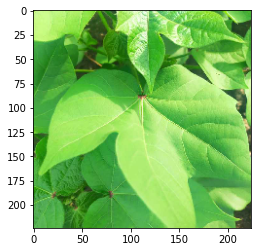

In [ ]:
# SAMPLE IMAGE FROM DATASET
from keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/fresh cotton leaf/d (16)_iaip.jpg', target_size=(224,224))
plt.imshow(img)

In [ ]:
# SETTING IMAGE SIZE 
imgSize = [224, 224]

In [ ]:
# LOADING TRANSFER LEARNING MODEL
inception = InceptionV3(input_shape=imgSize + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
# TO USE THE PRE-TRAINED WEIGHTS
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# USED FOR GETTING OUTPUT CLASSES
classes = glob('/content/drive/My Drive/Deep Learning/cotton_disease/train/*')

In [ ]:
# OUTPUT OF INCEPTION MODEL
out1 = Flatten()(inception.output)
prediction = Dense(len(classes), activation='softmax')(out1)

# cCREATE A MODEL OBJECT
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# IMAGE AUGMENTATION USING IMAGEDATAGENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainDatagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

testDatagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
trainingSet = trainDatagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/train', 
                                               target_size = (224, 224), 
                                               batch_size = 32, 
                                               class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
testSet = testDatagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# CHECKING THE MODEL LAYERS
modelLayers = [ layer.name for layer in model.layers]
print('Layer Name : ',modelLayers)

Layer Name :  ['input_1', 'conv2d', 'batch_normalization', 'activation', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'max_pooling2d', 'conv2d_3', 'batch_normalization_3', 'activation_3', 'conv2d_4', 'batch_normalization_4', 'activation_4', 'max_pooling2d_1', 'conv2d_8', 'batch_normalization_8', 'activation_8', 'conv2d_6', 'conv2d_9', 'batch_normalization_6', 'batch_normalization_9', 'activation_6', 'activation_9', 'average_pooling2d', 'conv2d_5', 'conv2d_7', 'conv2d_10', 'conv2d_11', 'batch_normalization_5', 'batch_normalization_7', 'batch_normalization_10', 'batch_normalization_11', 'activation_5', 'activation_7', 'activation_10', 'activation_11', 'mixed0', 'conv2d_15', 'batch_normalization_15', 'activation_15', 'conv2d_13', 'conv2d_16', 'batch_normalization_13', 'batch_normalization_16', 'activation_13', 'activation_16', 'average_pooling2d_1', 'conv2d_12', 'conv2d_14', 'conv2d_17', 'conv2d_18', 'batch_normalization_12', 'b

In [ ]:
img = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/fresh cotton leaf/d (16)_iaip.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# CHECKING THE CONVOLUTION OUTPUT
from keras.models import Model
convOutput = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
convFeatures = convOutput.predict(img)

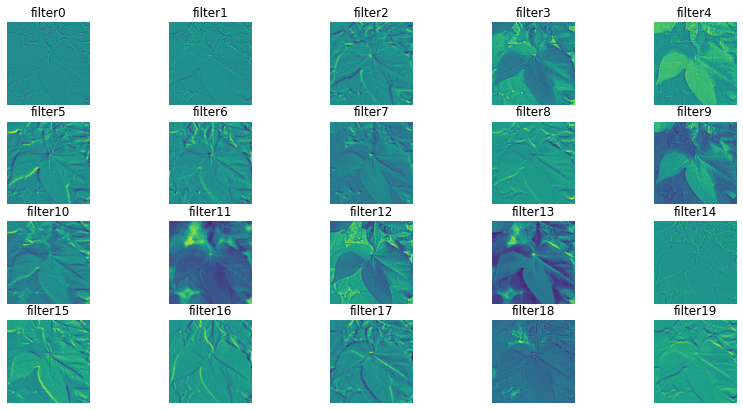

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(convFeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# CHECKING THE POOLING OUTPUT
poolingOutput = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
poolingfeatures = poolingOutput.predict(img)

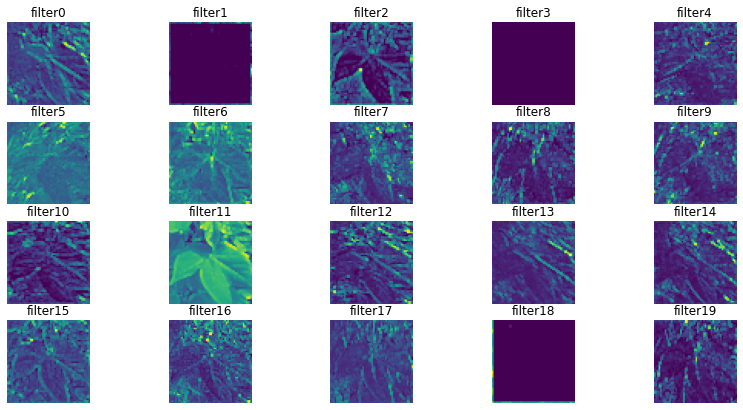

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(poolingfeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# TRAINING THE MODEL
history = model.fit_generator(
  trainingSet,
  validation_data=testSet,
  epochs=20,
  steps_per_epoch=len(trainingSet),
  validation_steps=len(testSet),
  verbose=1
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 787s 13s/step - loss: 5.3260 - accuracy: 0.5567 - val_loss: 0.4635 - val_accuracy: 0.8396
Epoch 2/20
61/61 [==============================] - 33s 549ms/step - loss: 0.5010 - accuracy: 0.9054 - val_loss: 0.9686 - val_accuracy: 0.8491
Epoch 3/20
61/61 [==============================] - 33s 547ms/step - loss: 0.8472 - accuracy: 0.8777 - val_loss: 0.0887 - val_accuracy: 0.9623
Epoch 4/20
61/61 [==============================] - 33s 545ms/step - loss: 0.3526 - accuracy: 0.9311 - val_loss: 0.2248 - val_accuracy: 0.9057
Epoch 5/20
61/61 [==============================] - 33s 546ms/step - loss: 0.4805 - accuracy: 0.9176 - val_loss: 0.5920 - val_accuracy: 0.9151
Epoch 6/20
61/61 [==============================] - 33s 543ms/step - loss: 0.4871 - accuracy: 0.9321 - val_loss: 0.3244 - val_accuracy: 0.9340
Epoch 7/20
61/61 [==============================] - 33s 545ms/step - loss: 0.3185 - accuracy: 0.9494 - val_loss: 0.2860 - val_accuracy: 0.9623


In [ ]:
# SAVING MODEL HISTORY
import pickle

with open('/content/drive/My Drive/Deep Learning/cotton_disease/histInceptionV3', 'wb') as f:
  pickle.dump(history.history, f)

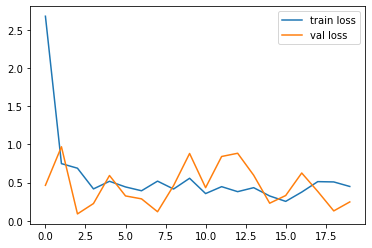

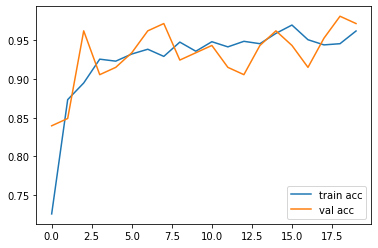

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOT LOSS
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# PLOT ACCURACY
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# SAVING MODEL
model.save('/content/drive/MyDrive/researchPaperDL/model_inceptionV3.h5')

# PREDICTIONS

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/researchPaperDL/model_resnet50.h5')

In [ ]:
imgPred = load_img('/content/drive/MyDrive/Deep Learning/cotton_disease/test/diseased cotton plant/dd (21)_iaip.jpg', target_size=(224,224))
imgPred = img_to_array(imgPred)
print(imgPred.shape)

(224, 224, 3)


In [ ]:
imgPred=np.expand_dims(imgPred,axis=0)
imgData=preprocess_input(imgPred)
imgData.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(imgData)
print(preds)
preds = np.argmax(preds, axis=1)

[[9.9627328e-01 2.6042949e-11 1.1404243e-03 2.5863366e-03]]


In [ ]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
